# <span style="color:red"> Numerical Simulation Laboratory </span>
## <span style="color:orange">  Numerical exercises 2: Samuele Voltan's notebook.</span>

In [2]:
# LIBRARIES
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

In [3]:
# FUNCTIONS
def error(AV, AV2, n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV*AV)/n)

def block_method(data): # Function for blocking method data analysis
    sum_prog = 0.
    sum2_prog = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        sum_prog = sum_prog + data[i]
        sum2_prog = sum2_prog + data[i]*data[i]
        AV = sum_prog / (i+1)
        AV2 = sum2_prog / (i+1)
        y[i,0] = AV
        y[i,1] = error(AV, AV2, i)
    return y

In [4]:
# DATA FILES
unif = np.loadtxt("data/lab02/ex02.1/ex02.1_uniforme.out")
lin = np.loadtxt("data/lab02/ex02.1/ex02.1_lineare.out")
data_lat = np.loadtxt("data/lab02/ex02.2/ex02.2_lattice.out")
data_cont = np.loadtxt("data/lab02/ex02.2/ex02.2_continuum.out")

### <span style="color:red"> Exercise 02.1
Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \text{d}x\,\frac{\pi}{2}\cos\frac{\pi x}{2} = 1 = c = \hbar$$
1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$).

Show a picture of both your estimations of $I$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</span>

### <span style="color:orange"> Solution
I divided the estimation in <code>N_blocks = 100</code> blocks of <code>N_throws = 10000</code> throws each, therefore having a total number of throws of $10^6$. In order to perform the evaluation of the integral sampling a non uniform distribution in $[0,1]$, We can see in the picture below that the distribution
$$p(x)=2(1-x),\qquad\int_0^1\text{d}x\,p(x)=1$$
stays sufficently near to the $\cos(\pi x/2)$ if $x\in[0,1]$, especially in the neighborhood of the node at $x = 1$, where the two functions coincide.

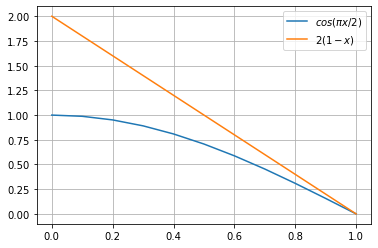

In [5]:
u = np.arange(0,1.1,0.1)
v = np.cos(u*np.pi*0.5)
z = 2 - 2*u
plt.plot(u,v,u,z)
plt.legend(['$cos(\pi x/2)$', '$2(1-x)$']) 
plt.grid(True)
plt.show()

The cumulative is given by the integral
$$y(x)=\int_0^x\text{d}t\,2(1-t)=2x-x^2$$
whence $x=1-\sqrt{1-y}$. The method for this sampling has been implemented in <code>Random/Random.cpp</code>. Here follow the two estimations.

UNIFORM: I = 0.9997 ± 0.0005
IMPORTANCE SAMPLING: I = 0.9999 ± 0.0001


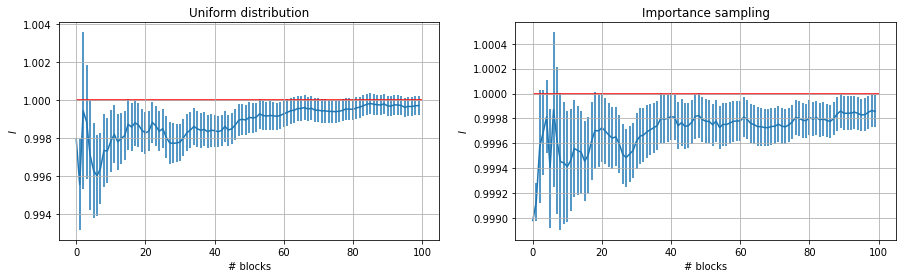

In [16]:
x = np.arange(100)
plt.figure(figsize=(15,4))
# Uniform
plt.subplot(1, 2, 1)
plt.title("Uniform distribution")
y = block_method(unif)
plt.errorbar(x,y[:,0], yerr = y[:,1], zorder = 0)
plt.hlines(1, 0, 100, colors = 'r', linestyles = 'solid', zorder = 1)
plt.xlabel(r"# blocks")
plt.ylabel(r"$I$")
plt.grid(True)
print(f"UNIFORM: I = {y[-1, 0]:.4f} ± {y[-1, 1]:.4f}")
# Importance sampling
plt.subplot(1, 2, 2)
plt.title("Importance sampling")
z = block_method(lin)
plt.errorbar(x,z[:,0], yerr = z[:,1], zorder = 0)
plt.hlines(1, 0, 100, colors = 'r', linestyles = 'solid', zorder = 1)
plt.xlabel(r"# blocks")
plt.ylabel(r"$I$")
plt.grid(True)
print(f"IMPORTANCE SAMPLING: I = {z[-1, 0]:.4f} ± {z[-1, 1]:.4f}")
plt.plot();

The results are both compatible with the theoretical prediction. Note that importance sampling has improved the estimation of $I$: errors have been significantly reduced, and the expected value differs from the true value by 1 $\sigma$.

### <span style="color:red"> Exercise 02.2
Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin
1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a=1$ along a *random direction* obtained by sampling *uniformly* the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of 
$$\langle R\rangle=\sqrt{\langle |\vec{r}_N|^2 \rangle_\text{RW}}$$
for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$. Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

### <span style="color:orange"> Solution
Here follow the parameters used.

In [7]:
N_blocks = 100     # Number of blocks
N_RWs = 1000       # Number of random walks per block
N_steps = 100      # Number of steps per RW

The expected distance after a number of $N_\text{steps}$ is $\langle R\rangle = \sqrt{N_\text{steps}}$, since $a=1$.

In [9]:
lattice = []
continuum = []
for i in range(N_steps):
    lattice.append(block_method(data_lat[:, i]))
    continuum.append(block_method(data_cont[:, i]))
lattice = np.array(lattice)
continuum = np.array(continuum)

LATTICE RW Best fit: (1.0085 ± 0.0019) * sqrt(x)
CONTINUUM RW Best fit: (1.008 ± 0.001858) * sqrt(x)


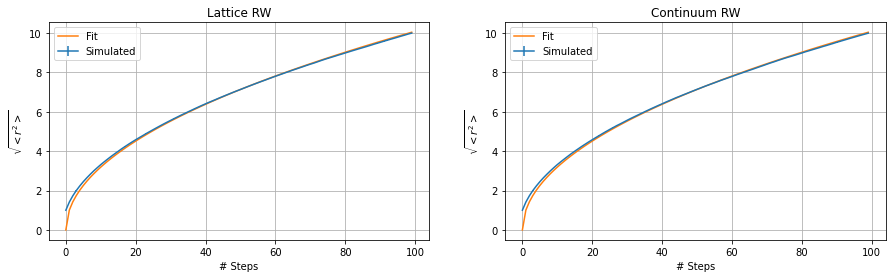

In [9]:
x = np.arange(N_steps)
f = lambda x, k: k * np.sqrt(x)
g = lambda x, l: l * np.sqrt(x)
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Lattice RW")
plt.grid()
plt.errorbar(x, lattice[:, -1, 0], yerr=lattice[:, -1, 1], label="Simulated")
popt, pcov = curve_fit(f, x, lattice[:, -1, 0])
k = popt[0]
sigma = np.sqrt(pcov[0, 0])
plt.plot(x, f(x, k), label='Fit')
plt.xlabel("# Steps")
plt.ylabel("$\\sqrt{<r^2>}$")
plt.legend()
print(f"LATTICE RW Best fit: ({k:.4f} ± {sigma:.4f}) * sqrt(x)")
plt.subplot(1, 2, 2)
plt.title("Continuum RW")
plt.grid()
plt.errorbar(x, continuum[:, -1, 0], yerr=continuum[:, -1, 1], label="Simulated")
popt, pcov = curve_fit(g, x, continuum[:, -1, 0])
l = popt[0]
sigma = np.sqrt(pcov[0, 0])
plt.plot(x, g(x, l), label='Fit')
plt.xlabel("# Steps")
plt.ylabel("$\\sqrt{<r^2>}$")
plt.legend()
print(f"CONTINUUM RW Best fit: ({l:.4g} ± {sigma:.4g}) * sqrt(x)")
plt.show()

Our results indicate a diffusive behavior.

Here I show the mean distance calculated from the last step of the RW.

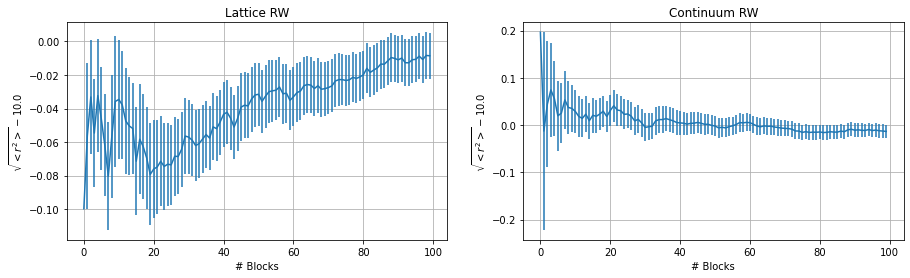

LATTICE RW: sqrt(<r^2>)-10.0 = -0.009 ± 0.014
CONTINUUM RW: sqrt(<r^2>)-10.0 = -0.013 ± 0.014


In [12]:
expected = np.sqrt(N_steps)
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Lattice RW")
plt.errorbar(x, lattice[-1, :, 0] - expected, yerr=lattice[-1, :, 1])
plt.xlabel(r"# Blocks")
plt.ylabel(r"$\sqrt{<r^2>}-" f"{expected}" r"$")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.title("Continuum RW")
plt.errorbar(x, continuum[-1, :, 0] - expected, yerr=continuum[-1, :, 1])
plt.xlabel(r"# Blocks")
plt.ylabel(r"$\sqrt{<r^2>}-" f"{expected}" r"$")
plt.grid(True)
plt.show()
print(f"LATTICE RW: sqrt(<r^2>)-{expected} = {lattice[-1, -1, 0]-expected:.3f} ± {lattice[-1, -1, 1]:.3f}")
print(f"CONTINUUM RW: sqrt(<r^2>)-{expected} = {continuum[-1, -1, 0]-expected:.3f} ± {continuum[-1, -1, 1]:.3f}")

The results are compatible with the theoretical prediction.